In [89]:
from collections import defaultdict
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plot
import gzip

In [90]:
def loadFasta(filename):
    """ Parses a classically formatted and possibly 
        compressed FASTA file into two lists. One of 
        headers and a second list of sequences.
        The ith index of each list correspond."""
    if (filename.endswith(".gz")):
        fp = gzip.open(filename, 'r')
    else:
        fp = open(filename, 'r')
    # split at headers
    data = fp.read().split('>')
    fp.close()
    # ignore whatever appears before the 1st header
    data.pop(0)     
    headers = []
    sequences = []
    for sequence in data:
        lines = sequence.split('\n')
        headers.append(lines.pop(0))
        # add an extra "+" to make string "1-referenced"
        sequences.append('+' + ''.join(lines))
    return (headers, sequences)

In [91]:
codon = {  # Maps an RNA triplet of nucelotides to a 1-letter Amino Acid Abbrevation 
    "AAA": 'K', "AAG": 'K', "AAC": 'N', "AAT": 'N',
    "AGA": 'R', "AGG": 'R', "AGC": 'S', "AGT": 'S',
    "ACA": 'T', "ACG": 'T', "ACC": 'T', "ACT": 'T',
    "ATA": 'I', "ATG": 'M', "ATC": 'I', "ATT": 'I',
    "GAA": 'E', "GAG": 'E', "GAC": 'D', "GAT": 'D',
    "GGA": 'G', "GGG": 'G', "GGC": 'G', "GGT": 'G',
    "GCA": 'A', "GCG": 'A', "GCC": 'A', "GCT": 'A',
    "GTA": 'V', "GTG": 'V', "GTC": 'V', "GTT": 'V',
    "CAA": 'Q', "CAG": 'Q', "CAC": 'H', "CAT": 'H',
    "CGA": 'R', "CGG": 'R', "CGC": 'R', "CGT": 'R',
    "CCA": 'P', "CCG": 'P', "CCC": 'P', "CCT": 'P',
    "CTA": 'L', "CTG": 'L', "CTC": 'L', "CTT": 'L',
    "TAA": '*', "TAG": '*', "TAC": 'Y', "TAT": 'Y',
    "TGA": '*', "TGG": 'W', "TGC": 'C', "TGT": 'C',
    "TCA": 'S', "TCG": 'S', "TCC": 'S', "TCT": 'S',
    "TTA": 'L', "TTG": 'L', "TTC": 'F', "TTT": 'F'
}

AminoAcid = { # Maps 1-letter Amino Acid Abbrevations to their full name
    'A': 'Alanine', 'C': 'Cysteine', 'D': 'Aspartic acid', 'E': 'Glutamic acid', 'F': 'Phenylalanine',
    'G': 'Glycine', 'H': 'Histidine', 'I': 'Isoleucine', 'K': 'Lysine', 'L': 'Leucine', 'M': 'Methionine',
    'N': 'Asparagine', 'P': 'Proline', 'Q': 'Glutamine', 'R': 'Arginine', 'S': 'Serine',
    'T': 'Theronine', 'V': 'Valine', 'W': 'Tryptophan', 'Y': 'Tyrosine', '*': 'STOP'
}

In [92]:
covid_gene_map = { # Maps he name of 
    "ORF1a": (266, 13484),
    "ORF1ab": (266, 21556),
    "S": (21563, 25385),
    "ORF3a": (25393, 26221),
    "E": (26245, 26473),
    "M": (26523, 27192),
    "ORF6": (27202, 27388),
    "ORF7a" : (27394, 27760),
    "ORF7b": (27756, 27888),
    "ORF8": (27894, 28260),
    "N": (28274, 29534),
    "ORF10": (29558, 29675),
}


In [93]:
def get_amino_acid_map(filepath, gene_map, gene):
    header, seq = loadFasta(filepath)
    start, end = gene_map[gene]
    gene_seq = seq[0][start:end]
    peptide = ''.join([codon[gene_seq[i:i+3]] for i in range(0,len(gene_seq),3)])
    # originally used defaultdict(int), but the order of the amino acids was inconsistent
    aminoacid_map = {}
    for amino_acid in AminoAcid:
        aminoacid_map[amino_acid] = 0
    for char in peptide:
        aminoacid_map[char] += 1
    return aminoacid_map

In [94]:
def compare_amino_acid_frequencies(filepath1, filepath2, gene_map, gene, name1, name2):
    map_a = get_amino_acid_map(filepath1, gene_map, gene)
    map_b = get_amino_acid_map(filepath2, gene_map, gene)
    a = plot.scatter(*zip(*map_a.items()))
    b = plot.scatter(*zip(*map_b.items()))
    plot.title("Comparing Frequencies of Amino Acids in the {} Gene Between the {} and {} Variants".format(gene, name1, name2))
    plot.legend((a, b),
           (name1, name2),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=8)
    plot.show()
    
    

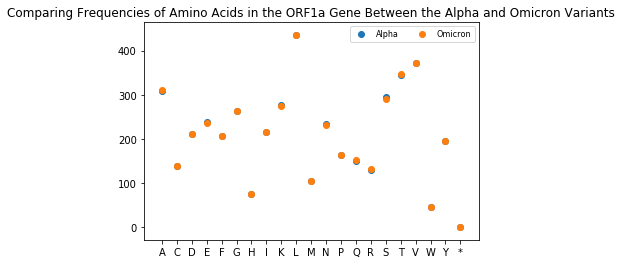

Key Error 'AA'. Cannot generate plot for ORF1ab gene


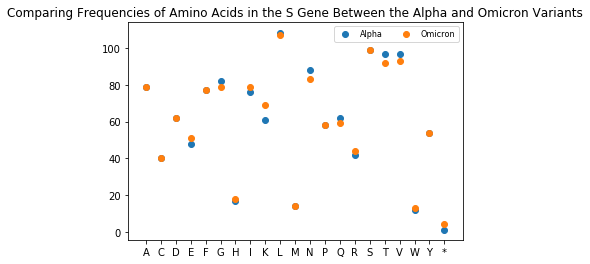

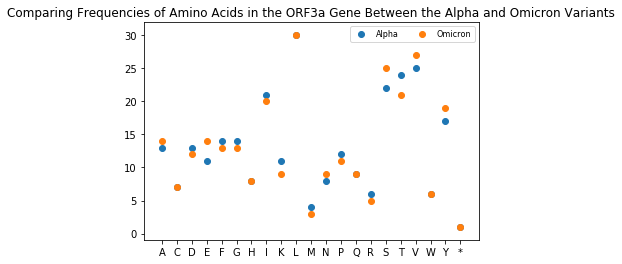

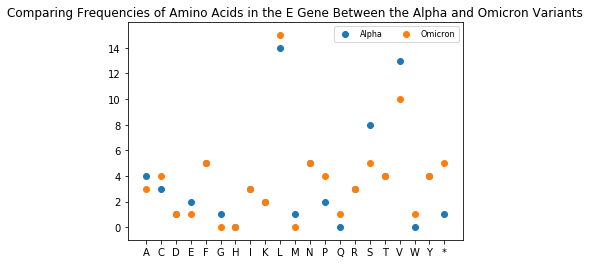

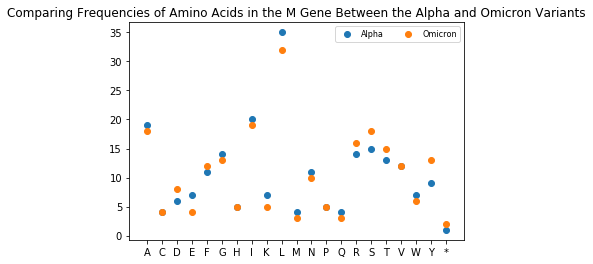

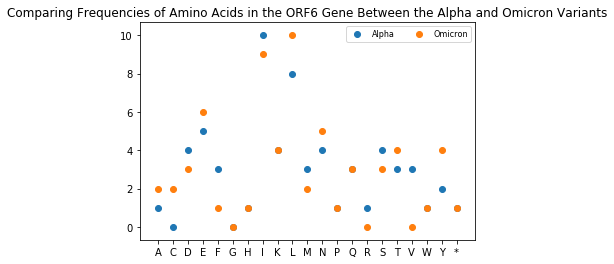

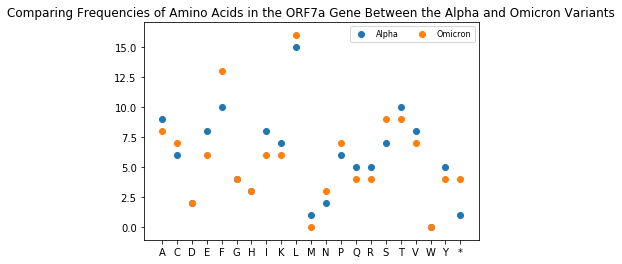

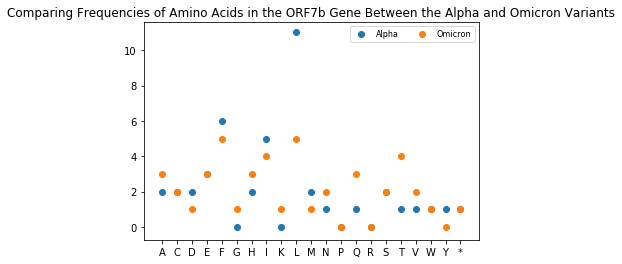

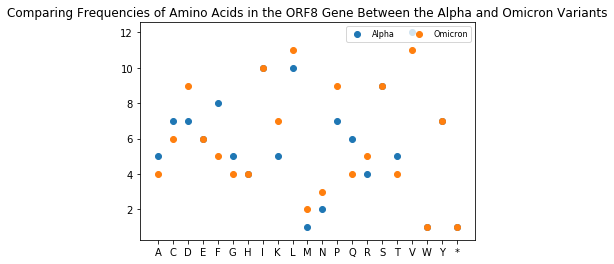

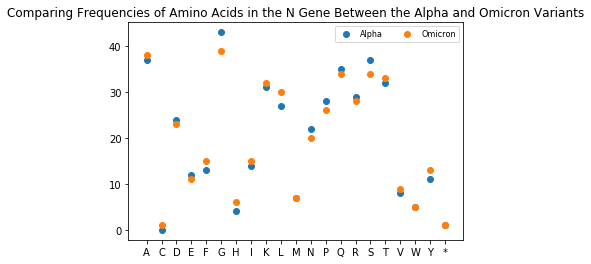

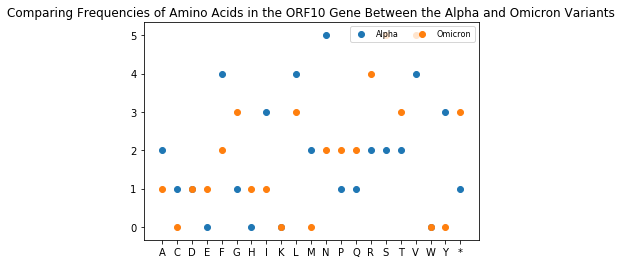

In [95]:
for gene in covid_gene_map:
    try:
        compare_amino_acid_frequencies("./data/SARS-COV-2Wuhan.fasta", "./data/SARS-COV-2Omicron.fasta",  covid_gene_map, gene, "Alpha", "Omicron")
    except KeyError as e:
            print("Key Error {}. Cannot generate plot for {} gene".format(e, gene))
            
            